<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.859 · Visualización de datos · PEC2</p>
<p style="margin: 0; text-align:right;">2024-2 · Máster universitario en Ciencia de datos (Data science)</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

<div class="alert alert-block alert-info">
<strong>Nombre:</strong>
    <strong>Carlos Alberto Agudelo Moncada</strong>
</div>

**Descripción:** 


El presente notebook realiza una limpieza de datos del dataset **Cardiovascular Disease Death Rates, Trends, and Excess Death Rates Among US Adults (35+) by County and Age Group – 2010-2020**  que se encuentra en https://healthdata.gov/dataset/Cardiovascular-Disease-Death-Rates-Trends-and-Exce/au45-g5w7/about_data 

El objetivo es generar un **Choropleth Map** que nos permita visualizar Estados Unidos con sus estados y poder identificar la tasa de muertes por razones cardiacas.

**Acerca de Dataset:**

Este conjunto de datos documenta las tasas de mortalidad por enfermedades cardiovasculares (DCV), las tasas de mortalidad relativa y absoluta excesiva y las tendencias. En concreto, este informe presenta las tendencias durante 2010-2019 y las tasas relativas y absolutas de mortalidad en 2020 por grupos de edad (35-64 años, 65 años y mayores). Todas las estimaciones se generaron utilizando un modelo espaciotemporal bayesiano y un alisado sobre el espacio, el tiempo y los grupos de edad de 10 años. Las tasas están estandarizadas según la edad en grupos de 10 años utilizando la población de los EE.UU., 2010. 

Fuente de datos: **National Vital Statistics System**.

In [1]:
import pandas as pd

In [2]:
# Ruta local del archivo CSV (ajusta si el path cambia)
archivo = 'Cardiovascular_Disease_Death_Rates__2010-2020.csv'

# Cargar el dataset
df = pd.read_csv(archivo)

# Presentamos las primeras filas
print(df.head())

   LocationID  Year LocationAbbr GeographicLevel DataSource  \
0        1001  2010           AL          County       NVSS   
1        1003  2010           AL          County       NVSS   
2        1005  2010           AL          County       NVSS   
3        1007  2010           AL          County       NVSS   
4        1009  2010           AL          County       NVSS   

                     Class                         Topic  Data_Value  \
0  Cardiovascular Diseases  Major Cardiovascular Disease       181.0   
1  Cardiovascular Diseases  Major Cardiovascular Disease       134.2   
2  Cardiovascular Diseases  Major Cardiovascular Disease       223.2   
3  Cardiovascular Diseases  Major Cardiovascular Disease       253.6   
4  Cardiovascular Diseases  Major Cardiovascular Disease       162.6   

  Data_Value_Unit                            Data_Value_Type  \
0     per 100,000  Age-Standardized, Spatially Smoothed Rate   
1     per 100,000  Age-Standardized, Spatially Smoothed Rate

C:\Users\cabet\AppData\Local\Temp\ipykernel_17956\128983933.py:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(archivo)


In [3]:
# Mostramos tipos de datos de cada columna
print(df.dtypes)

LocationID                      int64
Year                           object
LocationAbbr                   object
GeographicLevel                object
DataSource                     object
Class                          object
Topic                          object
Data_Value                    float64
Data_Value_Unit                object
Data_Value_Type                object
Data_Value_Footnote_Symbol     object
Data_Value_Footnote            object
Confidence_limit_Low          float64
Confidence_limit_High         float64
StratificationCategory1        object
Stratification1                object
TopicID                        object
X_long                        float64
Y_lat                         float64
dtype: object


In [4]:
# Revisamos los valores unicos para el atributo Data_Value_Unit
print(df['Data_Value_Unit'].unique())

['per 100,000' '%' nan]


In [5]:
# Eliminamos filas con NaN en Data_Value o donde la unidad sea '%'
df_limpio = df[~(df['Data_Value'].isna() | (df['Data_Value_Unit'] == '%'))].copy()

# Verificamos el resultado
print(df_limpio[['Data_Value', 'Data_Value_Unit']].head())
print(f"Filas restantes: {len(df_limpio)}")

   Data_Value Data_Value_Unit
0       181.0     per 100,000
1       134.2     per 100,000
2       223.2     per 100,000
3       253.6     per 100,000
4       162.6     per 100,000
Filas restantes: 93082


Filtrar solo registros con per 100,000

In [6]:
# Verificamos el resultado
print(df_limpio['Data_Value'].tail(10))

106818    1.004
106819    1.035
106820    0.998
106821    0.991
106822    1.035
106823    1.055
106824    1.026
106825    1.042
106826    1.034
106827    1.010
Name: Data_Value, dtype: float64


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

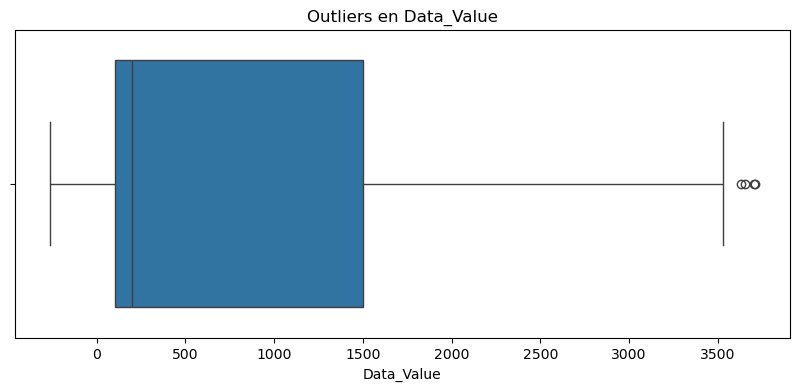

Cantidad de outliers: 4


In [8]:
# Usamos boxplot para visualizar los outliers
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_limpio['Data_Value'])
plt.title('Outliers en Data_Value')
plt.show()

# Método IQR para detectar outliers
Q1 = df_limpio['Data_Value'].quantile(0.25)
Q3 = df_limpio['Data_Value'].quantile(0.75)
IQR = Q3 - Q1

outliers = df_limpio[(df_limpio['Data_Value'] < Q1 - 1.5 * IQR) | (df_limpio['Data_Value'] > Q3 + 1.5 * IQR)]
print(f"Cantidad de outliers: {len(outliers)}")


In [9]:
# Filtramos los datos para el grupo de edad entre 35 y 64 años
filtro = df_limpio[df_limpio['Stratification1'] == 'Ages 35-64 years']

# Agrupamos por año, estado y sumamos los valores
df_agrupado = filtro.groupby(['Year', 'LocationAbbr'])['Data_Value'].mean().reset_index()

# Imprimimos el nuevo DataFrame
print(df_agrupado.head())

   Year LocationAbbr  Data_Value
0  2010           AK  124.065000
1  2010           AL  219.417910
2  2010           AR  194.564000
3  2010           AZ  115.326667
4  2010           CA  101.877193


In [10]:
print(df_agrupado.tail())

     Year LocationAbbr  Data_Value
709  2020           VT   54.046429
710  2020           WA   51.558442
711  2020           WI   51.836111
712  2020           WV   85.846364
713  2020           WY   58.904444


In [11]:
# Agrupar por estado y calcular el promedio de Data_Value
df_estado = filtro.groupby('LocationAbbr')['Data_Value'].mean().reset_index()

# Renombramos la columna LocationAbbr para mayor claridad
df_estado.rename(columns={'LocationAbbr': 'State'}, inplace=True)

# Renombramos la columna Data_Value para mayor claridad
df_estado.rename(columns={'Data_Value': 'Mean_Data_Value_35_64'}, inplace=True)

# Mostramos el nuevo DataFrame
print(df_estado.head())

  State  Mean_Data_Value_35_64
0    AK             100.765707
1    AL             204.479782
2    AR             186.373678
3    AZ             108.061400
4    CA              92.984326


In [12]:
import numpy as np

# Función para truncar a 1 decimal
def truncar_a_un_decimal(x):
    return np.floor(x * 10) / 10

# Aplicar al campo Data_Value
df_estado['Mean_Data_Value_35_64'] = df_estado['Mean_Data_Value_35_64'].fillna(0).apply(truncar_a_un_decimal)

# Verificar resultado
print(df_estado['Mean_Data_Value_35_64'])


0     100.7
1     204.4
2     186.3
3     108.0
4      92.9
5      73.6
6      72.8
7     159.4
8     105.2
9     121.8
10    168.7
11     93.4
12     99.9
13     82.6
14    116.1
15    122.8
16    107.5
17    172.9
18    184.8
19     67.9
20    108.7
21     84.0
22    110.8
23     72.2
24    148.5
25    213.4
26     93.8
27    127.7
28     95.9
29     84.5
30     78.0
31     88.4
32    104.0
33    116.8
34     92.6
35    120.1
36    177.6
37     78.4
38     99.3
39     68.3
40    175.4
41     95.0
42    177.4
43    135.9
44     71.6
45    125.8
46     78.8
47     82.5
48     83.0
49    133.3
50     92.9
Name: Mean_Data_Value_35_64, dtype: float64


In [13]:
# Exportamos a CSV para cargarlo en flourish y generar el mapa desde allí.
df_estado.to_csv("Cardiovascular_Disease_Death_2010-2020_State.csv", index=False, sep=",", float_format="%.2f")

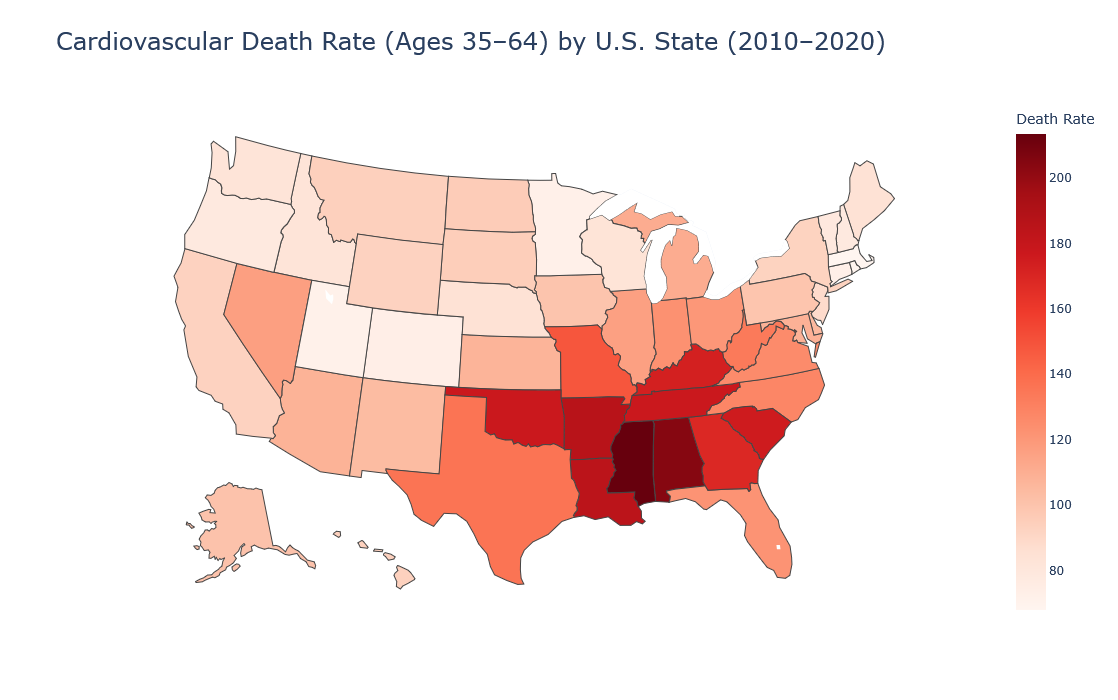

In [15]:
import plotly.express as px

# Creamos el mapa
fig = px.choropleth(
    df_estado,
    locations='State',
    locationmode='USA-states',
    color='Mean_Data_Value_35_64',
    scope='usa',
    color_continuous_scale='Reds',
    labels={'Mean_Data_Value_35_64': 'Death Rate'},  # sin el %
    title='Cardiovascular Death Rate (Ages 35–64) by U.S. State (2010–2020)'
)

# Aumentamos tamaño del mapa
fig.update_layout(
    width=1000,
    height=700,
    title_font_size=24
)

fig.update_coloraxes(colorbar_title='Death Rate')

# Personalizamos el hover para mostrar el valor
fig.update_traces(
    hovertemplate='<b>%{location}</b><br>Death Rate: %{z:.1f}<extra></extra>'
)

fig.show()


Con el dataframe exportado a CSV en el archivo  **Cardiovascular_Disease_Death_2010-2020_State.csv** procedemos a generar el mapa en herramienta flourish. El cual se puede encontrar en: https://public.flourish.studio/visualisation/22431535/